In [451]:
# importo le librerie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Impostazioni per visualizzazione migliore dei grafici
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)
print("Setup impostato correttamente.")

Setup impostato correttamente.


In [452]:
# Caricamento dei dati
df_originale = pd.read_json('/Users/marcosalvato/Desktop/salvato_marco-prova_pratica/dati/DatiJSON_placentaprevia PROVA C.json')
df_originale.head(10) # vializzo in prima istanza i primi 10 record del dataset

,Eta,NumeroGravidanzePregresse,NumeroTagliCesareiPregressi,PrecedentePlacentaPrevia,SanguinamentiNelSecondoTrimestre,InsulinaSiericaDueOre,IndiceDiMassaCorporea,FecondazioneAssisitita,PazienteAffettaDaPlacentaPrevia
0,24,0,0,0,0,107,22,0,0
1,31,3,0,0,0,98,29,0,0
2,28,2,1,0,0,104,33,0,0
3,45,4,1,0,1,99,24,0,0
4,37,4,0,0,1,110,19,0,0
5,24,2,1,1,1,230,29,1,1
6,30,3,0,0,0,90,24,0,0
7,47,1,0,0,0,97,33,0,0
8,34,3,0,0,0,82,27,0,0
9,34,2,1,0,1,110,29,0,0


In [453]:
# Inizio analisi esplorativa dei dati
display(df_originale.info()) # visualizzo le informazioni generali del dataset
display(df_originale.describe()) # visualizzo tutte le statistiche descrittive del dataset (media, mediana, dev std)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Eta                               10002 non-null  int64
 1   NumeroGravidanzePregresse         10002 non-null  int64
 2   NumeroTagliCesareiPregressi       10002 non-null  int64
 3   PrecedentePlacentaPrevia          10002 non-null  int64
 4   SanguinamentiNelSecondoTrimestre  10002 non-null  int64
 5   InsulinaSiericaDueOre             10002 non-null  int64
 6   IndiceDiMassaCorporea             10002 non-null  int64
 7   FecondazioneAssisitita            10002 non-null  int64
 8   PazienteAffettaDaPlacentaPrevia   10002 non-null  int64
dtypes: int64(9)
memory usage: 703.4 KB


None

,Eta,NumeroGravidanzePregresse,NumeroTagliCesareiPregressi,PrecedentePlacentaPrevia,SanguinamentiNelSecondoTrimestre,InsulinaSiericaDueOre,IndiceDiMassaCorporea,FecondazioneAssisitita,PazienteAffettaDaPlacentaPrevia
count,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000
mean,33.233053,1.958508,0.649270,0.234453,0.300240,102.425615,25.977005,0.276345,0.100080
std,10.436670,1.213520,0.744116,0.423678,0.458385,35.287720,6.097815,0.447212,0.300122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,1.000000,0.000000,0.000000,0.000000,88.000000,22.000000,0.000000,0.000000
50%,34.000000,2.000000,1.000000,0.000000,0.000000,96.000000,26.000000,0.000000,0.000000
75%,42.000000,3.000000,1.000000,0.000000,1.000000,105.000000,31.000000,1.000000,0.000000
max,50.000000,4.000000,4.000000,1.000000,1.000000,250.000000,35.000000,1.000000,1.000000


## Ok, grazie a questo breve overview posso notare innanzi tutto che le colonne dei dati forniti risulatano essere tutte numeriche in quanto il dtype è int64 è questo è positivo, inoltre altro aspetto positivo è che non siano presenti alcuni valori NaN da gestire.

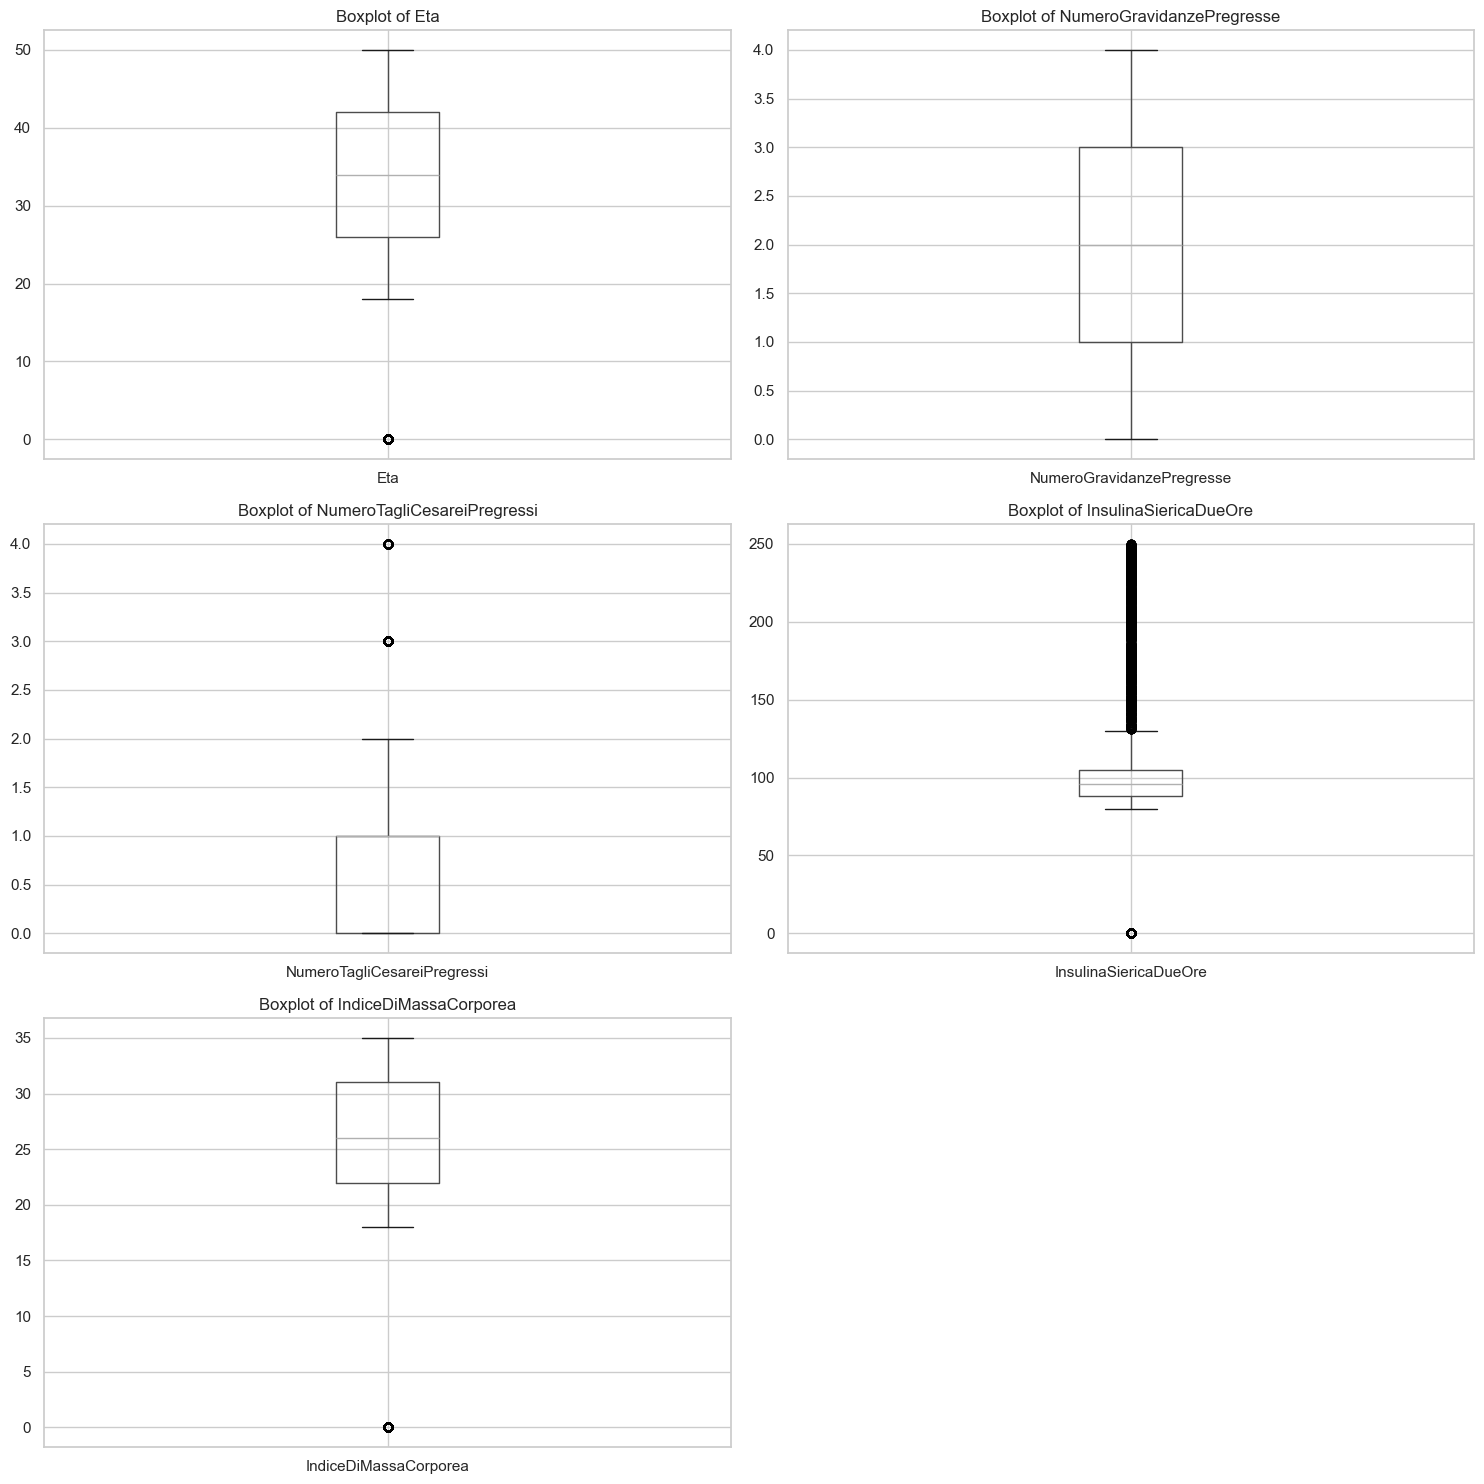

In [454]:
# Ora passiamo a visualizzare i dati in modo da poterli analizzare meglio
# utilizzo questa funzione per creare dei grafici boxplot creata in precedenza, li crea solo per colonne 
# numeriche che in questo caso sono tutte, devo però aggiungere di escludere quelle categoriche 0 e 1
cat_columns = [col for col in df_originale.columns if len(df_originale[col].value_counts()) == 2] # salvo le categoriche 0 e 1

def plot_boxplots(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    numerical_columns = [col for col in numerical_columns if len(df[col].value_counts()) > 2] # tolgo le categoriche 0 e 1
    num_plots = len(numerical_columns)
    
    fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(15, 5 * ((num_plots + 1) // 2)))
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_columns):
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_boxplots(df_originale) # visualizzo i boxplot per ogni colonna numerica del dataset

### Noto intanto che ci sono delle anomalie nei dati, in particolare per le colonne 'età' dove sono presenti valori nulli a 0, indice di massa corporea dove anche qui troviamo 0, inoltre troviamo degli outliers nel numero di tagli cesarei, che potrebbero rendere il modello meno generalizzabile.

In [455]:
# visto che ora iniziamo a mettere mano ai dati, creo una copia del dataframe originale
df = df_originale.copy()
# partiamo subito con la rimozione di possibili duplicati
print(len(df))
df.drop_duplicates(inplace=True)
print(len(df)) # visualizzo la lunghezza del dataframe dopo la rimozione dei duplicati

10002
9949


In [456]:
# iniziamo con la pulizia dei dati, in particolare per le colonne 'età' e 'indice di massa corporea' che hanno valori nulli a 0
print(f"Righe prima della pulizia di Eta e IMC: {len(df)}")
df = df[df['Eta'] > 0]
df = df[df['IndiceDiMassaCorporea'] > 0]
print(f"Righe dopo la pulizia di Eta e IMC: {len(df)}")

Righe prima della pulizia di Eta e IMC: 9949
Righe dopo la pulizia di Eta e IMC: 9539


In [457]:
# gestiamo gli outlier, iniziamo dal vedere quanti valori intanto abbiamo fuori dalla media
df['NumeroTagliCesareiPregressi'].value_counts()

NumeroTagliCesareiPregressi
1    4606
0    4360
2     243
3     229
4     101
Name: count, dtype: int64

### ok direi che rispetto al totale potremmo fare a meno dei valori superiori a 2 (o forse ancora meglio sarebbe creare una colonna 0, 1 e >1, da fare eventualmente dopo), tra l'altro è una colonna ad ordinamento ordinale e già numerica.

In [458]:
# uniamo in unica classe i valori maggiori di 2
#df['NumeroTagliCesareiPregressi'] = df['NumeroTagliCesareiPregressi'].apply(lambda x: x if x <= 2 else 2)

# dopo le analisi fatte abbiamo capito che la colonna è molto importante per la presenza di placenta previa, quindi non la modifichiamo

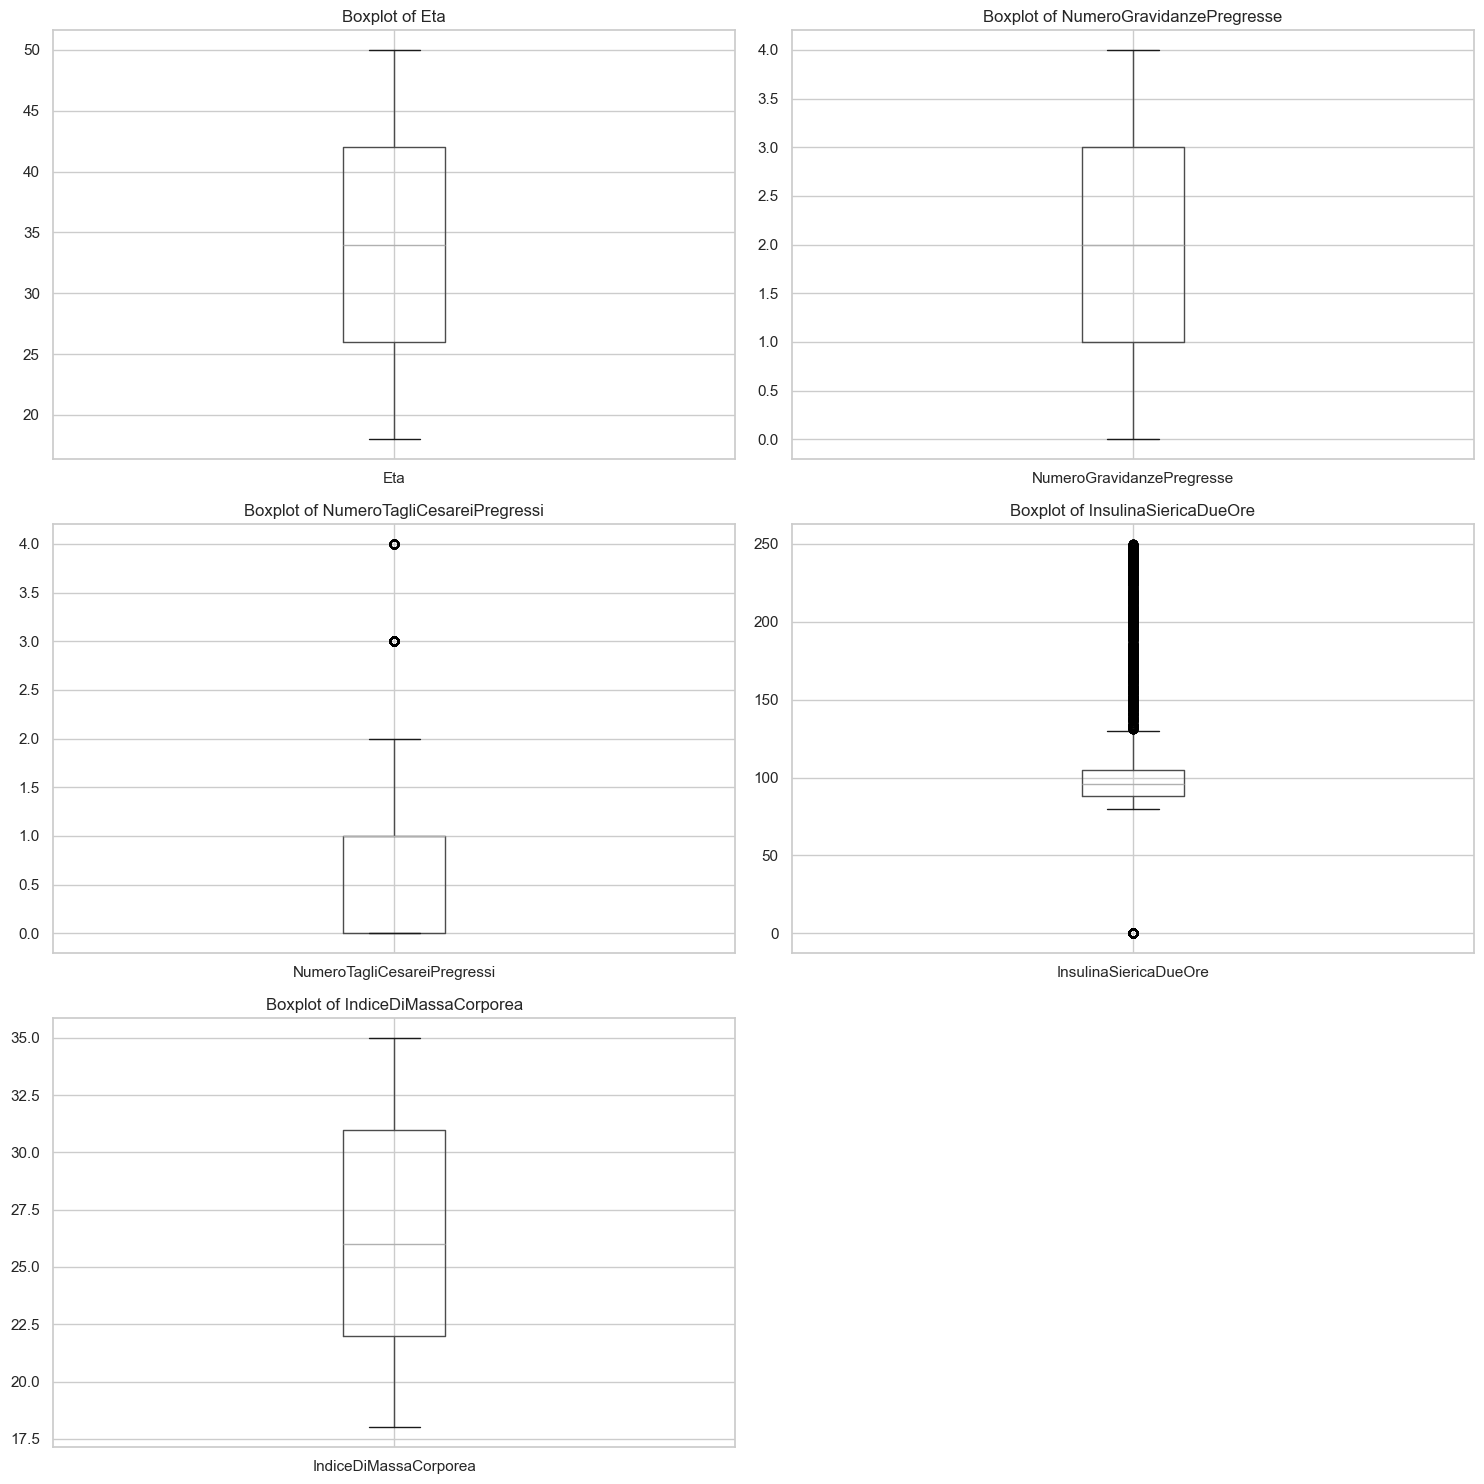

In [459]:
# rivediamo i boxplot
plot_boxplots(df) # visualizzo i boxplot per ogni colonna numerica del dataset dopo la pulizia

In [460]:
# vediamo cosa sta succedendo invece con la colonna InsulinaSiericaDueOre 
df['InsulinaSiericaDueOre'].value_counts() # visualizzo i valori della colonna InsulinaSiericaDueOre

InsulinaSiericaDueOre
87     329
98     308
93     304
94     302
109    295
      ... 
142      4
174      3
130      3
159      3
211      2
Name: count, Length: 153, dtype: int64

## proviamo a vedere come influenza prendere valori di InsulinaSiericaDueOre dentro il Q1 e Q3
q1 = df['InsulinaSiericaDueOre'].quantile(0.25)
q3 = df['InsulinaSiericaDueOre'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr        
df = df[(df['InsulinaSiericaDueOre'] >= lower_bound) & (df['InsulinaSiericaDueOre'] <= upper_bound)]

## praticamente prendendo solamente i valori tra q1 e q3 rimaniamo senza casi positivi quindi lasciamo così, evidentemente questa variabile è molto importante per la presenza di placenta previa, quindi non la modifichiamo

In [461]:
len(df)

9539

In [462]:
## abbiamo perso un po' di dati, ma non sono molti, quindi possiamo procedere, questo bilancia moldo il dataset e rende più affidabile l'analisi,
# anche se perdiamo valori alti di correlazione tra le colonne

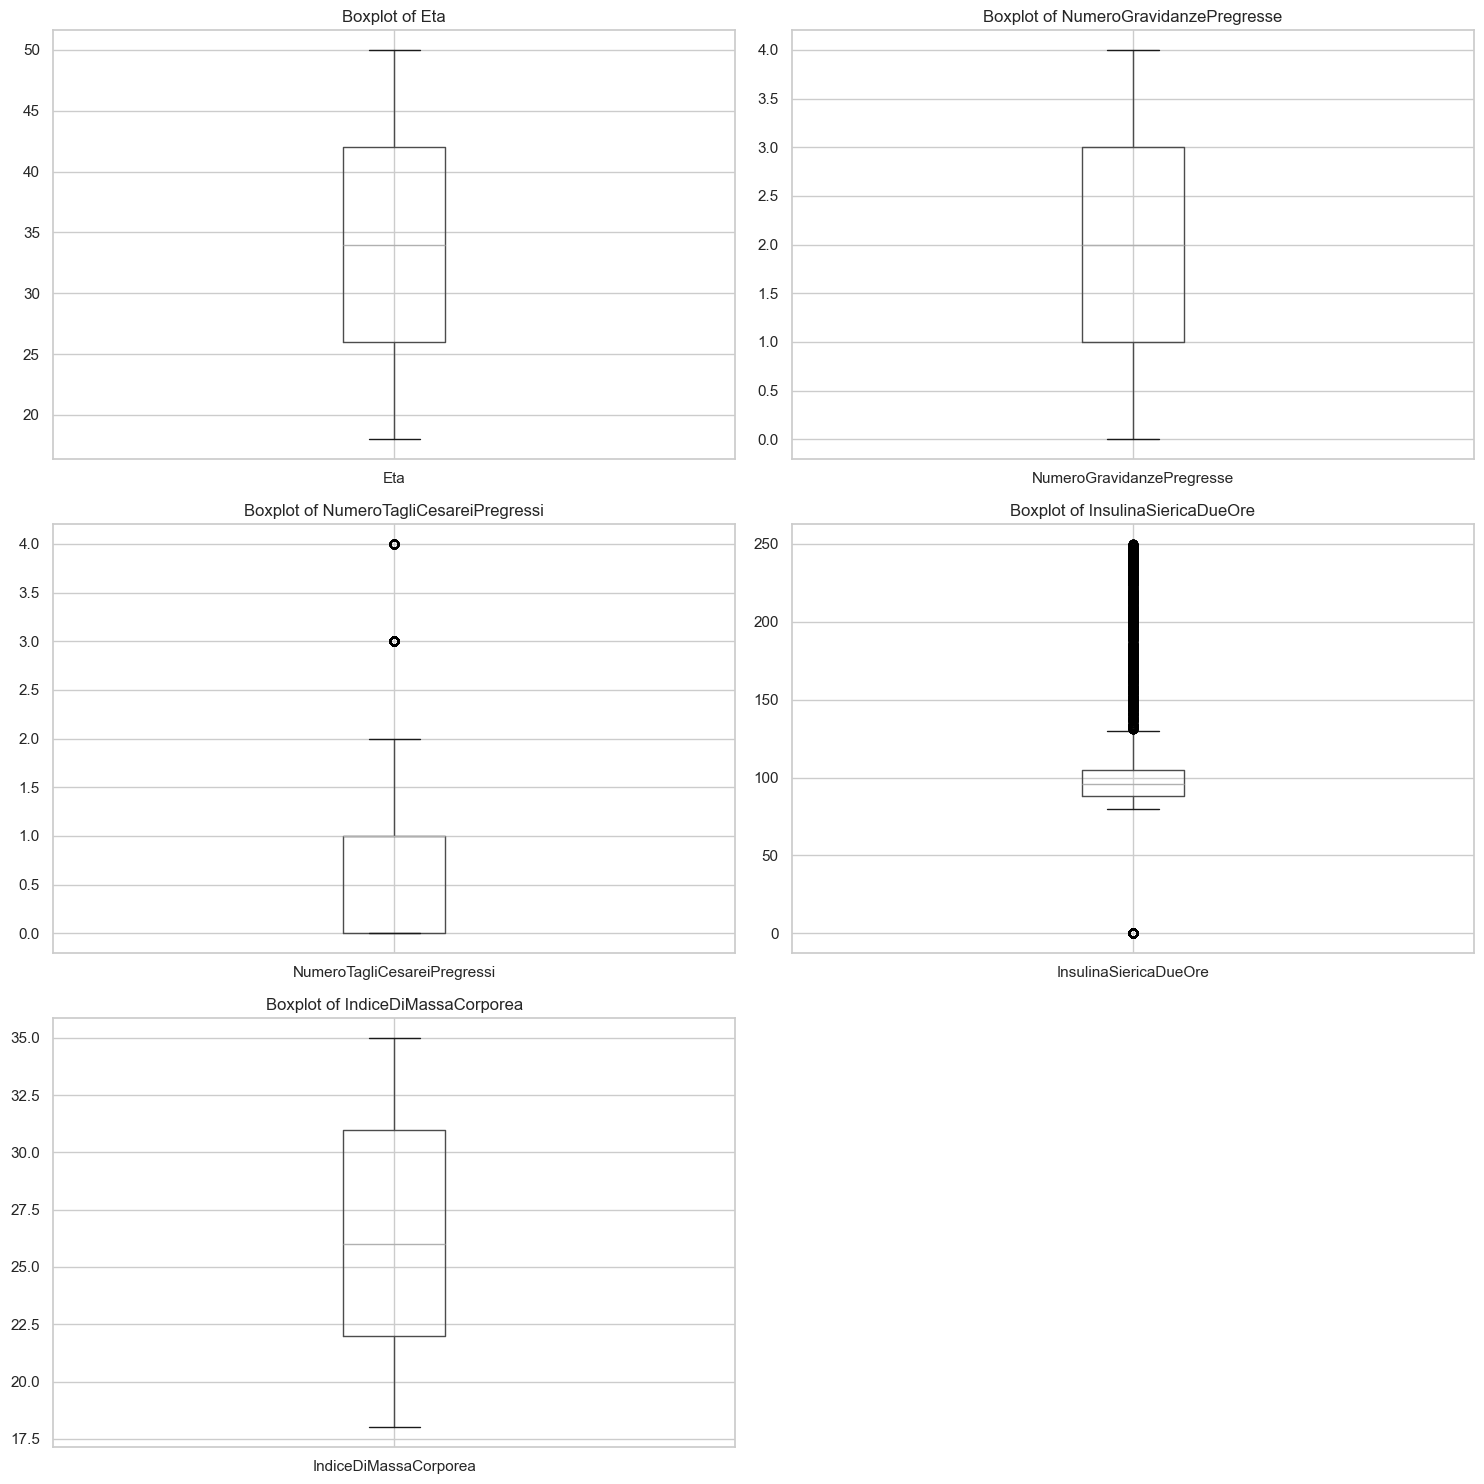

In [463]:
# rivediamo i boxplot
plot_boxplots(df) # visualizzo i boxplot per ogni colonna numerica del dataset dopo la pulizia

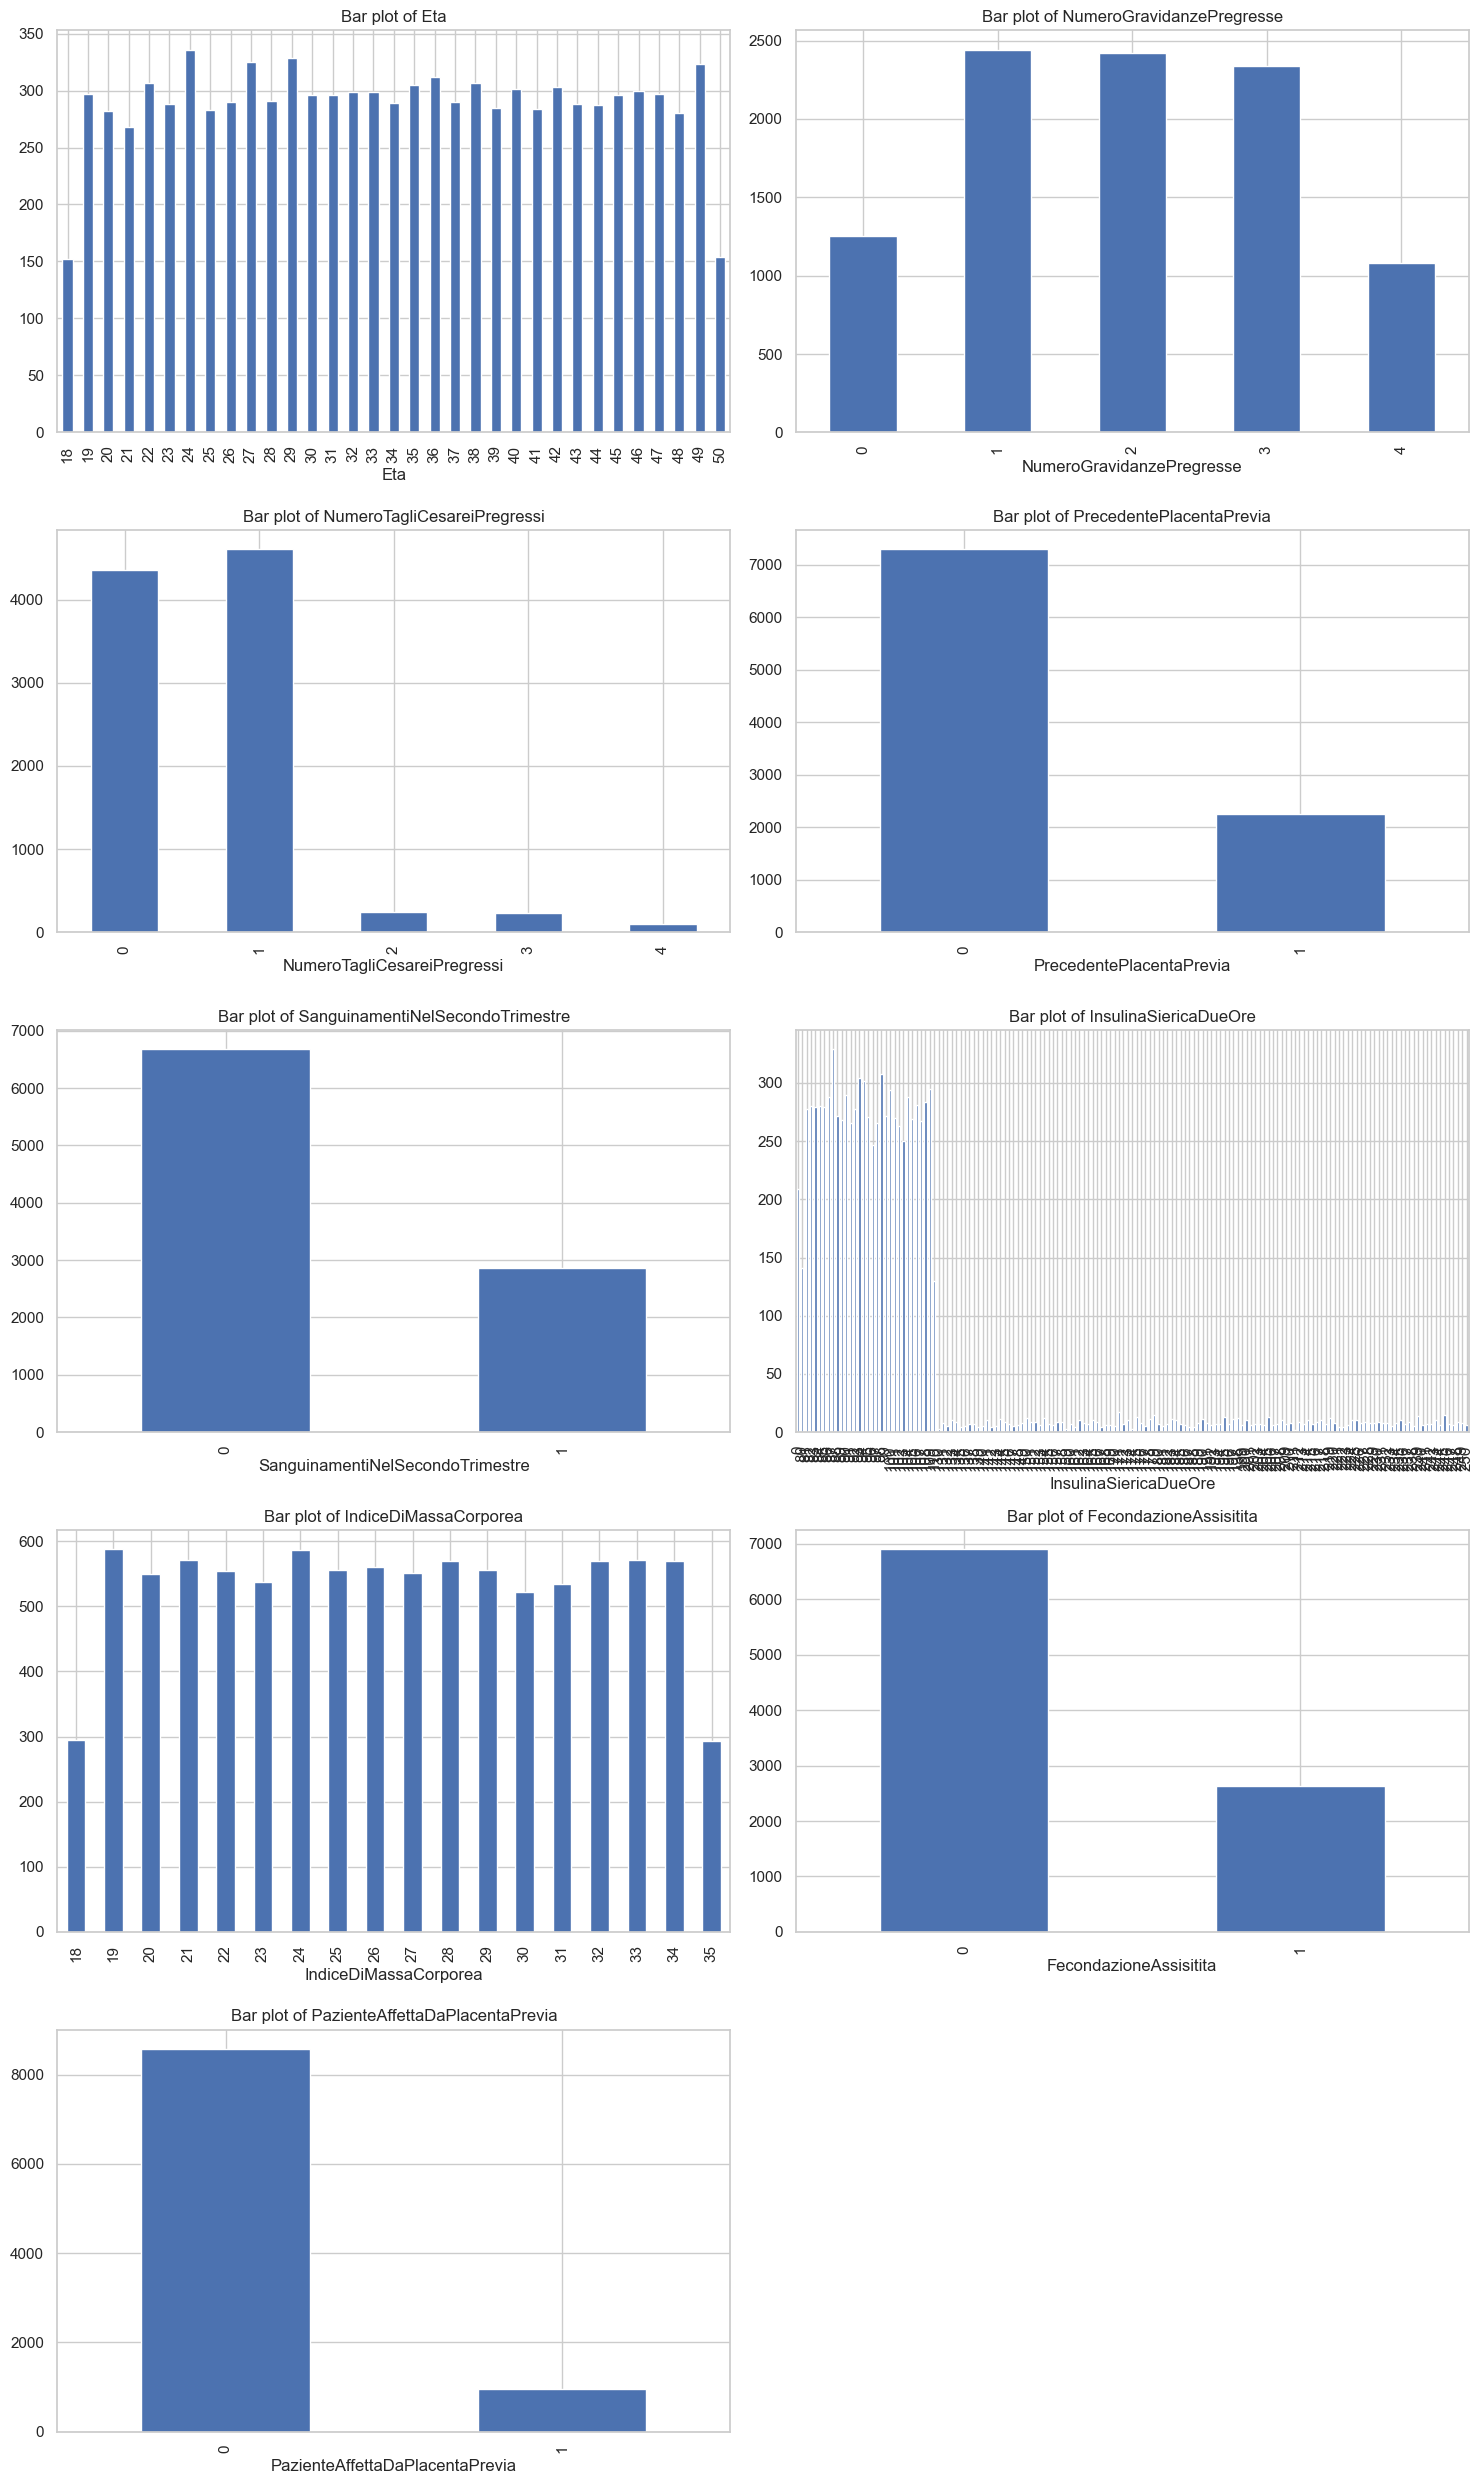

In [464]:
# meglio plottare anche dei bar plot per le distribuzioni delle colonne numeriche per vedere se ci sono anomalie

def plot_bar(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    num_plots = len(numerical_columns)
    
    fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(15, 5 * ((num_plots + 1) // 2)))
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_columns):
        # Ordino i valori sull'asse x in ordine crescente usando sort_index()
        df[col].value_counts().sort_index().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Bar plot of {col}')
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()
    

plot_bar(df) # visualizzo gli istogrammi per ogni colonna numerica del dataset

### Grazie al plot qui sopra possiamo anche capire come sono distribuiti i valori nelle varie colonne e notare se ci sono palesi sbilanciamenti o meno. Non sono molto convinto dei dati riguardanti l'insulina sarei propenso ad utilizzare i valori tra Q1 e Q3 in modo da evitare sbilanciamento, per il resto vediamo che le classi 0 e 1 sono abbastanza sbilanciate, ma magari c'è una correlazione tra loro.

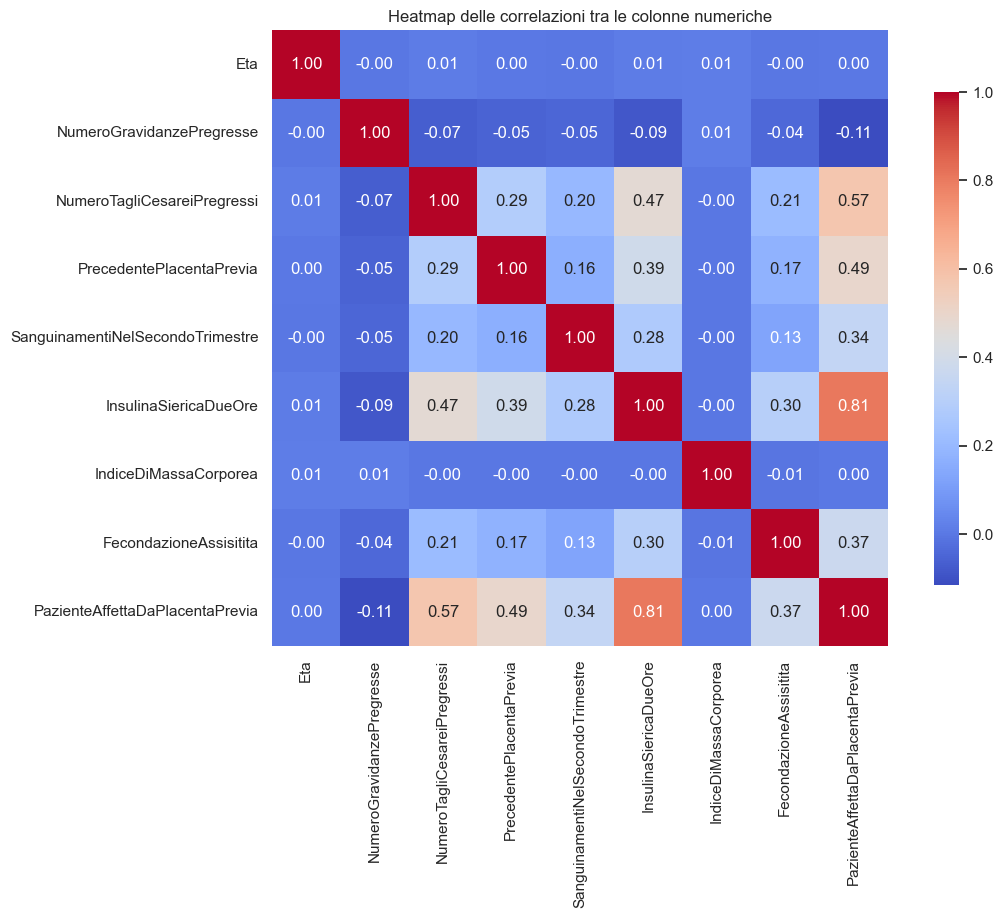

In [465]:
# utilizziamo seaborn per visualizzare le correlazioni tra le colonne numeriche
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap delle correlazioni tra le colonne numeriche')
plt.show()

## Da questo grafico capiamo subito che le features che contengono più informazione utile correlata con la presenza di Placenta Previa, sono 'NumeroTagliCesareiPregressi', 'PrecendetePlacentaPrevia', e i livelli di 'InsulinaSiericaDueOre'.

## Inoltre la colonna NumeroTagliCesareiPregressi se vengono rimossi pari o superiori a 2 o se vengono accorpati nella stessa classe perde di valore di correlazione.

## Analizziamo allora un attimo come sono le statistiche solo nel casi positivi.

In [466]:
df_positivi = df[df['PazienteAffettaDaPlacentaPrevia'] == 1] # creo un dataframe solo con i casi positivi
df_negativi = df[df['PazienteAffettaDaPlacentaPrevia'] == 0] # creo un dataframe solo con i casi negativi
print(len(df_positivi), len(df_negativi)) # visualizzo la lunghezza dei due dataframe
display(df_positivi.describe()) # visualizzo le statistiche descrittive dei casi positivi
display(df_negativi.describe()) # visualizzo le statistiche descrittive dei casi negativi

961 8578


,Eta,NumeroGravidanzePregresse,NumeroTagliCesareiPregressi,PrecedentePlacentaPrevia,SanguinamentiNelSecondoTrimestre,InsulinaSiericaDueOre,IndiceDiMassaCorporea,FecondazioneAssisitita,PazienteAffettaDaPlacentaPrevia
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.0
mean,34.023933,1.539022,1.919875,0.860562,0.763788,187.566077,26.498439,0.772112,1.0
std,9.096499,0.944715,1.196710,0.346583,0.424975,43.626708,4.924244,0.419688,0.0
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,1.0
25%,26.000000,1.000000,1.000000,1.000000,1.000000,160.000000,22.000000,1.000000,1.0
50%,34.000000,2.000000,2.000000,1.000000,1.000000,191.000000,27.000000,1.000000,1.0
75%,42.000000,2.000000,3.000000,1.000000,1.000000,220.000000,31.000000,1.000000,1.0
max,50.000000,3.000000,4.000000,1.000000,1.000000,250.000000,35.000000,1.000000,1.0


,Eta,NumeroGravidanzePregresse,NumeroTagliCesareiPregressi,PrecedentePlacentaPrevia,SanguinamentiNelSecondoTrimestre,InsulinaSiericaDueOre,IndiceDiMassaCorporea,FecondazioneAssisitita,PazienteAffettaDaPlacentaPrevia
count,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.0
mean,34.002565,1.998951,0.505712,0.165656,0.248076,92.814992,26.474819,0.220681,0.0
std,9.245048,1.233826,0.499997,0.371794,0.431922,16.358756,4.963515,0.414730,0.0
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.0
25%,26.000000,1.000000,0.000000,0.000000,0.000000,87.000000,22.000000,0.000000,0.0
50%,34.000000,2.000000,1.000000,0.000000,0.000000,94.000000,26.000000,0.000000,0.0
75%,42.000000,3.000000,1.000000,0.000000,0.000000,102.000000,31.000000,0.000000,0.0
max,50.000000,4.000000,1.000000,1.000000,1.000000,110.000000,35.000000,1.000000,0.0


# interessante effettivamente le mediane dei valori delle colonne correlate sono maggiori rispetto a quelle dei casi negativi

In [467]:
# carico i dati puliti in un file csv
df.to_csv('/Users/marcosalvato/Desktop/salvato_marco-prova_pratica/dati/DatiCSV_placentaprevia_puliti.csv', index=False)
print("Dati puliti e salvati correttamente in DatiCSV_placentaprevia_puliti.csv")

Dati puliti e salvati correttamente in DatiCSV_placentaprevia_puliti.csv
